In [69]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd

In [73]:
df = pd.read_csv(r'C:\Users\Hp\Documents\Jupyter Notebook\CarRentalReview\Merged.csv', encoding='ISO-8859-1')

In [75]:
print(df.head())

                                               title  \
0  2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...   
1  2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...   
2  2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...   
3  2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van...   
4  2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...   

                                              review  
0  It's been a great delivery vehicle for my cafe...  
1  Bought this car as a commuter vehicle for a va...  
2  This van rocks its the best, lots of \n room. ...  
3  Great work vehicle. Drives nice. has lots of r...  
4  Good solid frame and suspension. Well equipped...  


In [77]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [79]:
from textblob import TextBlob

In [81]:
def get_rating(review):
    analysis = TextBlob(review)
    # Normalize the polarity score from [-1, 1] to [1, 5]
    rating = int((analysis.sentiment.polarity + 1) * 2)  # scale to [0, 2]
    rating += 1  # scale to [1, 5]
    return rating

In [83]:
df['rating'] = df['review'].apply(get_rating)

In [85]:
# Display the updated DataFrame with the rating column
print(df[['title', 'review', 'rating']].head())

                                               title  \
0  2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...   
1  2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...   
2  2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...   
3  2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van...   
4  2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...   

                                              review  rating  
0  It's been a great delivery vehicle for my cafe...       3  
1  Bought this car as a commuter vehicle for a va...       2  
2  This van rocks its the best, lots of \n room. ...       5  
3  Great work vehicle. Drives nice. has lots of r...       4  
4  Good solid frame and suspension. Well equipped...       3  


In [87]:
# Count the occurrences of each sentiment rating
rating_counts = df['rating'].value_counts().sort_index()
print(rating_counts)

rating
2     19
3    168
4     11
5      1
Name: count, dtype: int64


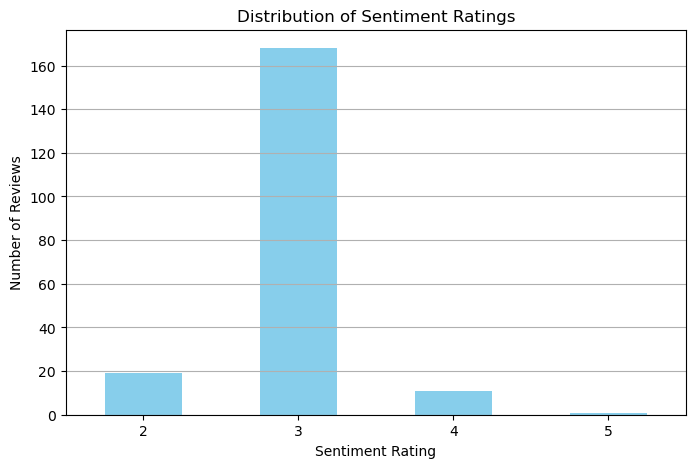

In [89]:
import matplotlib.pyplot as plt

# Create a bar plot of sentiment ratings
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Ratings')
plt.xlabel('Sentiment Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [91]:
# Specify the output file path
output_file_path = r'C:\Users\Hp\Documents\Jupyter Notebook\CarRentalReview\Merged_TextBlob.csv'

# Save the DataFrame to a CSV file
df[['title', 'review', 'rating']].to_csv(output_file_path, index=False)
print(f"File saved at: {output_file_path}")

File saved at: C:\Users\Hp\Documents\Jupyter Notebook\CarRentalReview\Merged_TextBlob.csv


In [25]:
pwd

'C:\\Users\\Hp\\Documents\\Jupyter Notebook\\CarRentalReview'

In [93]:
print(df[['title', 'review', 'rating']].tail(2))

                                                 title  \
197  2005 Dodge Magnum Wagon SXT AWD 4dr Wagon (3.5...   
198  2008 Dodge Magnum Wagon SXT 4dr Wagon (3.5L 6c...   

                                                review  rating  
197  My 2005 Magnum has numerous serious problems i...       2  
198  I special ordered my 2008 Magnum SXT for deliv...       3  


In [103]:
import pandas as pd
import os
from textblob import TextBlob

# Define file paths
merged_file_path = 'C:/Users/Hp/Documents/Jupyter Notebook/CarRentalReview/Merged.csv'
merged_textblob_file_path = 'C:/Users/Hp/Documents/Jupyter Notebook/CarRentalReview/Merged_TextBlob.csv'

# Function to check and print the columns of the existing CSV file
def check_columns():
    if os.path.exists(merged_file_path):
        # Read the CSV into a DataFrame
        df_merged = pd.read_csv(merged_file_path)
        
        # Print the column names to see what's inside
        print("Existing columns in Merged.csv:", df_merged.columns.tolist())
        return df_merged
    else:
        print(f"{merged_file_path} does not exist.")
        return None

# Function to calculate rating from review text
def get_rating(review):
    blob = TextBlob(review)
    polarity_score = blob.sentiment.polarity
    # Normalize polarity from [-1, 1] to [1, 5]
    return (polarity_score + 1) * 2 + 1

# Function to add new review and rating to Merged.csv and Merged_TextBlob.csv
def add_review_and_rating(title, review):
    # Check if Merged.csv exists
    df_merged = check_columns()

    if df_merged is None:
        # If Merged.csv doesn't exist, create an empty dataframe with correct headers
        df_merged = pd.DataFrame(columns=['title', 'review'])
        print("Created new Merged.csv")

    # Create a new row for the review
    new_review_row = pd.DataFrame({'title': [title], 'review': [review]})

    # Append new review while maintaining column order
    df_merged = pd.concat([df_merged[['title', 'review']], new_review_row[['title', 'review']]], ignore_index=True)

    # Save to Merged.csv
    df_merged.to_csv(merged_file_path, index=False)
    print(f"New review appended to {merged_file_path}")

    # Get rating for the review
    rating = get_rating(review)

    # Add review with rating to Merged_TextBlob.csv
    if os.path.exists(merged_textblob_file_path):
        df_textblob = pd.read_csv(merged_textblob_file_path)
    else:
        df_textblob = pd.DataFrame(columns=['title', 'review', 'rating'])

    # Create new row for Merged_TextBlob.csv with rating
    new_review_row_textblob = pd.DataFrame({'title': [title], 'review': [review], 'rating': [rating]})

    # Append the new review row with rating to Merged_TextBlob.csv
    df_textblob = pd.concat([df_textblob[['title', 'review', 'rating']], new_review_row_textblob[['title', 'review', 'rating']]], ignore_index=True)

    # Save to Merged_TextBlob.csv
    df_textblob.to_csv(merged_textblob_file_path, index=False)
    print(f"New review with rating added to {merged_textblob_file_path}")

# Example usage
add_review_and_rating("Toyota test", "The car was way speedy and saved our time")

Existing columns in Merged.csv: ['title', 'review']
New review appended to C:/Users/Hp/Documents/Jupyter Notebook/CarRentalReview/Merged.csv
New review with rating added to C:/Users/Hp/Documents/Jupyter Notebook/CarRentalReview/Merged_TextBlob.csv
